In [81]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
# CSV files
bom_movie_gross = pd.read_csv(r'E:\moringa school\phase_2\Group7_Phase_2_Project\data\bom.movie_gross.csv', encoding='ISO-8859-1')
tmdb_movies = pd.read_csv(r'E:\moringa school\phase_2\Group7_Phase_2_Project\data\tmdb.movies.csv', encoding='ISO-8859-1')
tn_movie_budgets = pd.read_csv(r'E:\moringa school\phase_2\Group7_Phase_2_Project\data\tn.movie_budgets.csv', encoding='ISO-8859-1')

# TSV files
rt_movie_info = pd.read_csv(r'E:\moringa school\phase_2\Group7_Phase_2_Project\data\rt.movie_info.tsv', sep='\t', encoding='ISO-8859-1')
rt_reviews = pd.read_csv(r'E:\moringa school\phase_2\Group7_Phase_2_Project\data\rt.reviews.tsv', sep='\t', encoding='ISO-8859-1')

In [83]:
# Connect to the SQLite database
conn = sqlite3.connect(r"E:\moringa school\phase_2\Group7_Phase_2_Project\data\im.db")

In [84]:
# Get table names
table_name_query = """SELECT name 
                      AS 'Table Names' 
                      FROM sqlite_master 
                      WHERE type='table';"""

tables=pd.read_sql(table_name_query, conn)
tables

,Table Names
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [85]:
# Explore movie_basics table
movie_basics = pd.read_sql("""
SELECT * FROM movie_basics LIMIT 5;
""", conn)

movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [86]:
known_for = pd.read_sql("""
SELECT * FROM known_for LIMIT 5;
""", conn)
known_for

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


In [87]:
movie_ratings = pd.read_sql("""
SELECT * FROM movie_ratings LIMIT 5;
""", conn)
movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [88]:
movie_akas = pd.read_sql("""
SELECT * FROM movie_akas LIMIT 5;
""", conn)
movie_akas

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [89]:
persons = pd.read_sql("""
SELECT * FROM persons LIMIT 5;
""", conn)
persons

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,None,None,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,None,None,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,None,None,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,None,None,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,None,None,"production_designer,art_department,set_decorator"


In [90]:
directors = pd.read_sql("""
SELECT * FROM directors LIMIT 5;
""", conn)
directors

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [91]:
principals = pd.read_sql("""
SELECT * FROM principals LIMIT 5;
""", conn)
principals

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


In [150]:
writers = pd.read_sql("""
SELECT * FROM writers LIMIT 5;
""", conn)
writers


,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


In [152]:
# 2. Merge movie_basics with movie_ratings
movie_data = pd.merge(movie_basics, movie_ratings, on='movie_id', how='left')
movie_data

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",NaN,NaN
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",NaN,NaN
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,NaN,NaN
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",NaN,NaN
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",NaN,NaN


In [154]:
# 3. Merge directors with persons to get director names
directors_data = pd.merge(directors, persons[['person_id', 'primary_name']], on='person_id', how='left')
directors_data = directors_data.rename(columns={'primary_name': 'director_name'})
directors_data

,movie_id,person_id,director_name
0,tt0285252,nm0899854,NaN
1,tt0462036,nm1940585,NaN
2,tt0835418,nm0151540,NaN
3,tt0835418,nm0151540,NaN
4,tt0878654,nm0089502,NaN


In [156]:
# 4. Merge writers with persons to get writer names
writers_data = pd.merge(writers, persons[['person_id', 'primary_name']], on='person_id', how='left')
writers_data = writers_data.rename(columns={'primary_name': 'writer_name'})
writers_data

,movie_id,person_id,writer_name
0,tt0285252,nm0899854,NaN
1,tt0438973,nm0175726,NaN
2,tt0438973,nm1802864,NaN
3,tt0462036,nm1940585,NaN
4,tt0835418,nm0310087,NaN


In [158]:
# 5. Merge principals with persons to get actor/actress names
principals_data = pd.merge(principals, persons[['person_id', 'primary_name']], on='person_id', how='left')
principals_data

,movie_id,ordering,person_id,category,job,characters,primary_name
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]",NaN
1,tt0111414,2,nm0398271,director,None,None,NaN
2,tt0111414,3,nm3739909,producer,producer,None,NaN
3,tt0323808,10,nm0059247,editor,None,None,NaN
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]",NaN


In [97]:
# 6. Filter principals to only get actors and actresses
actors_data = principals_data[principals_data['category'].isin(['actor', 'actress'])]
actors_data 

,movie_id,ordering,person_id,category,job,characters,primary_name
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]",NaN
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]",NaN


In [160]:
# 7. Group actors by movie_id (corrected)
actors_grouped = actors_data.groupby('movie_id')['primary_name'].apply( lambda x: ', '.join(x.dropna())).reset_index()
actors_grouped = actors_grouped.rename(columns={'primary_name': 'actor_names'})
actors_grouped


,movie_id,actor_names
0,tt0111414,
1,tt0323808,


In [162]:
# 8. Now combine everything together step-by-step
final_data = movie_data
final_data

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",NaN,NaN
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",NaN,NaN
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,NaN,NaN
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",NaN,NaN
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",NaN,NaN


In [164]:
# Merge director names
final_data = pd.merge(final_data, directors_data[['movie_id', 'director_name']], on='movie_id', how='left')
final_data

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,director_name
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",NaN,NaN,NaN
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",NaN,NaN,NaN
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,NaN,NaN,NaN
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",NaN,NaN,NaN
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",NaN,NaN,NaN


In [166]:
# Merge writer names
final_data = pd.merge(final_data, writers_data[['movie_id', 'writer_name']], on='movie_id', how='left')
final_data

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,director_name,writer_name
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",NaN,NaN,NaN,NaN
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",NaN,NaN,NaN,NaN
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,NaN,NaN,NaN,NaN
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",NaN,NaN,NaN,NaN
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",NaN,NaN,NaN,NaN


In [168]:
# Merge actor names
final_data = pd.merge(final_data, actors_grouped, on='movie_id', how='left')
final_data

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,director_name,writer_name,actor_names
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",NaN,NaN,NaN,NaN,NaN
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",NaN,NaN,NaN,NaN,NaN
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,NaN,NaN,NaN,NaN,NaN
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",NaN,NaN,NaN,NaN,NaN
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",NaN,NaN,NaN,NaN,NaN


In [103]:
# final_data = final_data[[
#     'primary_title', 'start_year', 'genres', 'averagerating',
#     'director_name', 'writer_name', 'actor_names'
# ]]

In [132]:
# 11. Check the final result
print(final_data.head(20))

    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  averagerating  numvotes  \
0        2013            175.0    Action,Crime,Drama            NaN       NaN   
1        2019            114.0       Biography,Drama            NaN       NaN   
2        2018            122.0                 Drama            NaN       NaN   
3        2018              NaN          Comedy,Drama            NaN       NaN   
4        2017             80.0  Comedy,Drama,Fantasy            NaN       NaN   

  director_name writer_name actor_names  
0       

In [130]:
# Check missing values by column
print(final_data.isnull().sum())


movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    1
genres             0
averagerating      5
numvotes           5
director_name      5
writer_name        5
actor_names        5
dtype: int64


In [136]:
# Check missing values by column
final_data.shape


(5, 11)

In [176]:
final_data['genres_list'] = final_data['genres'].dropna().str.split(',')
genres_exploded = final_data.explode('genres_list')

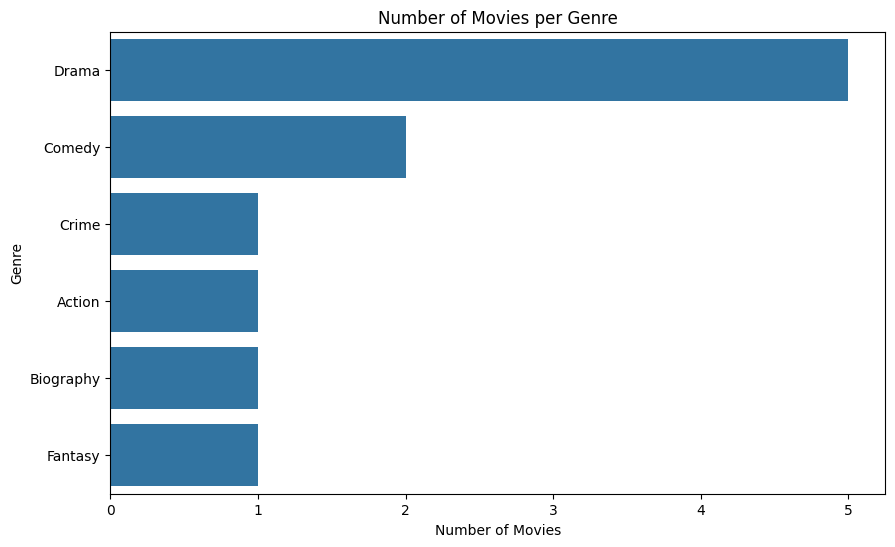

In [178]:
plt.figure(figsize=(10,6))
sns.countplot(data=genres_exploded, y='genres_list', order=genres_exploded['genres_list'].value_counts().index)
plt.title('Number of Movies per Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

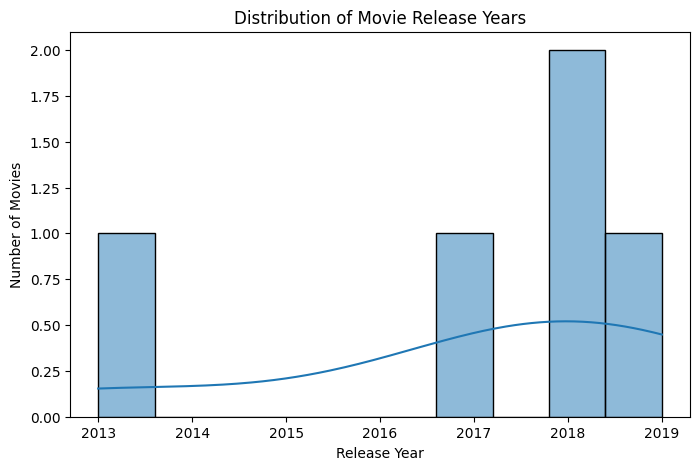

In [180]:
# 2. Movies by Start Year
plt.figure(figsize=(8,5))
sns.histplot(data=final_data, x='start_year', bins=10, kde=True)
plt.title('Distribution of Movie Release Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.show()

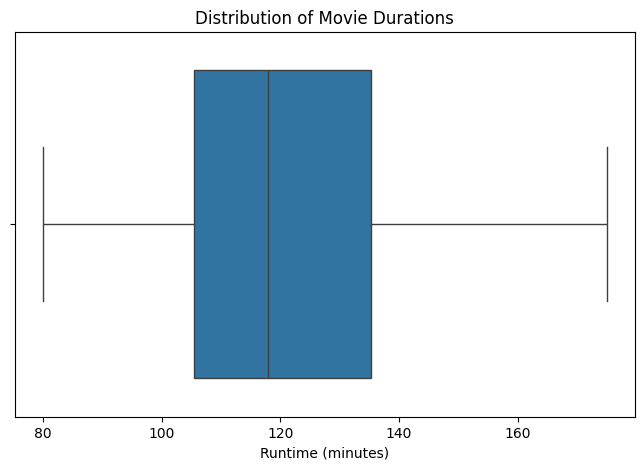

In [182]:
# 3. Runtime Distribution
plt.figure(figsize=(8,5))
sns.boxplot(data=final_data, x='runtime_minutes')
plt.title('Distribution of Movie Durations')
plt.xlabel('Runtime (minutes)')
plt.show()


In [184]:
for df in [bom_movie_gross, tmdb_movies, tn_movie_budgets, rt_movie_info, rt_reviews]:
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [188]:
print(bom_movie_gross.head())

                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  


In [194]:
print(bom_movie_gross.shape)
print(bom_movie_gross.shape)
print(tmdb_movies.shape)
print(tn_movie_budgets.shape)
print(rt_movie_info.shape)
print(rt_reviews.shape)

(3387, 5)
(3387, 5)
(26517, 10)
(5782, 6)
(1560, 12)
(54432, 8)


In [192]:
print(bom_movie_gross.head())
print(tmdb_movies.head())
print(tn_movie_budgets.head())
print(rt_movie_info.head())
print(rt_reviews.head())

                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  
   unnamed:_0            genre_ids     id original_language  \
0           0      [12, 14, 10751]  12444                en   
1           1  [14, 12, 16, 10751]  10191                en   
2           2        [12, 28, 878]  10138                en   
3           3      [16, 35, 10751]    862                en   
4           4        [28, 878, 12]  27205                en   

                                 origi